# Exploratory Data Analysis

This exploratory data analysis seeks to determine if there is any bias in the Seattle Police Department's use of Terry Stops. Some areas I want to explore are how individual police beats are related to stops, the idea being that denser or lower income areas of the city may have more stops and/or arrests. I also want to look at if Race plays a part in the number of stops/arrests made. I want to compare the percentage of stops by race with the Seattle's population demographics. I would also like to see if the presence of weapons affects a stop as well. 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CSV/terry_stops_eda.csv')

---

### Stop Resolutions: Target Variable Distribution

In [3]:
num_arrests = df.stop_resolution.value_counts()[2]
num_non_arrests = sum(df.stop_resolution.value_counts()[:2])+sum(df.stop_resolution.value_counts()[3:])

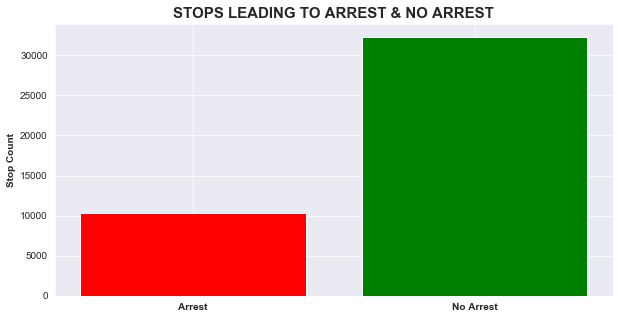

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
plt.bar(['1','0'], [num_arrests, num_non_arrests], color=['red', 'green'])
plt.title('STOPS LEADING TO ARREST & NO ARREST', fontdict={'fontweight':'bold', 'fontsize':15})
plt.xticks(ticks=[0,1], labels=['Arrest','No Arrest'], weight='bold')
plt.ylabel('Stop Count', weight='bold')
plt.show()

In [5]:
year = df.groupby(['reported_year','stop_resolution']).stop_resolution.count()
arrest = [year[0], year[5], year[10], year[15], year[20], year[25]]
no_arrest = [year[1:5].sum(), year[6:10].sum(), year[11:15].sum(), year[16:20].sum(), year[21:25].sum(), year[25:].sum()]
years = ['2015', '2016', '2017', '2018', '2019', '2020']

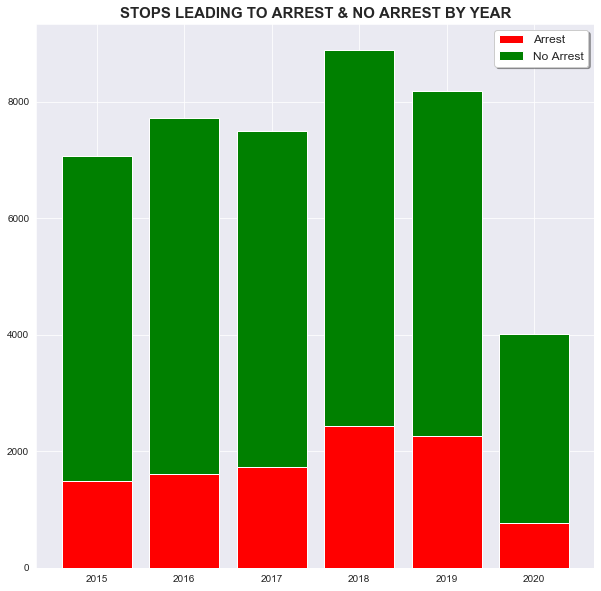

In [57]:
plt.figure(figsize=(10,10))
p1 = plt.bar(years, arrest, color='red')
p2 = plt.bar(years, no_arrest, bottom=arrest, color='green')
plt.title('STOPS LEADING TO ARREST & NO ARREST BY YEAR', fontweight='bold', fontsize=15)
plt.legend(['Arrest', 'No Arrest'], fontsize='large', shadow=True, facecolor='white')
plt.show()

---

### Stop Resolutions

Showing the totals for all stop resolutions

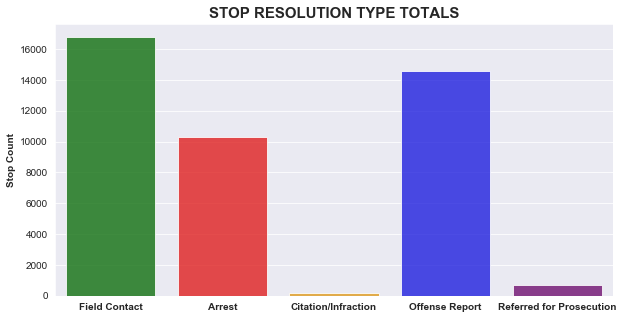

In [78]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df.stop_resolution, alpha =.80, palette=['green','red','orange','blue','purple'])
plt.title('STOP RESOLUTION TYPE TOTALS', fontdict={'fontweight':'bold', 'fontsize':15})
plt.xticks(ticks=[0,1,2,3,4], labels=['Field Contact','Arrest', 'Citation/Infraction', 'Offense Report', 'Referred for Prosecution'], weight='bold')
plt.ylabel('Stop Count', weight='bold')
plt.xlabel('')
plt.show()

Stop resolutions by year

In [58]:
citation_infraction = [year[1], year[6], year[11], year[16], year[21], year[26]]
field_contact = [year[2], year[7], year[12], year[17], year[22], year[27]]
offense_report = [year[3], year[8], year[13], year[18], year[23], year[28]]
referred_prosecution = [year[4], year[9], year[14], year[19], year[24], year[29]]
legend_stop_res = ['Arrest', 'Citation/Infraction', 'Field Contact', 'Offense Report', 'Referred Prosecution']

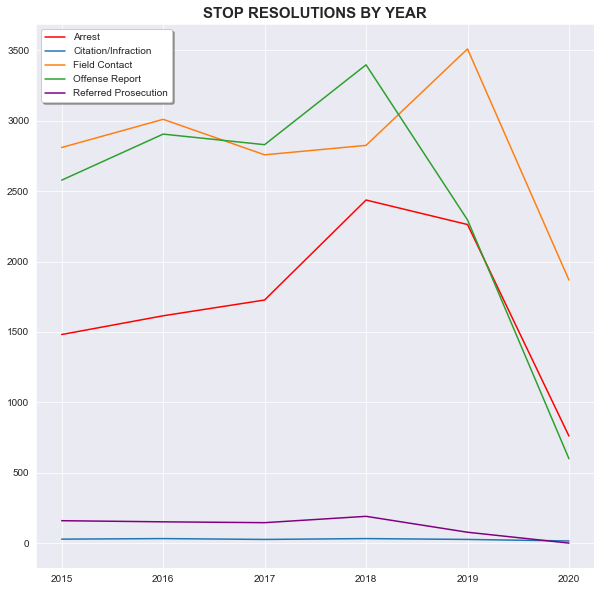

In [80]:
plt.figure(figsize=(10,10))
l1 = plt.plot(years, arrest, color='red')
l2 = plt.plot(years, citation_infraction)
l3 = plt.plot(years, field_contact)
l4 = plt.plot(years, offense_report)
l5 = plt.plot(years, referred_prosecution, color='purple')
plt.title('STOP RESOLUTIONS BY YEAR', fontweight='bold', fontsize=15)
plt.legend(legend_stop_res, shadow=True, facecolor='white')
plt.show()

---

### Call Types

In [10]:
print('{} {}'.format('Initial/Final Call Type Empty Values:', df.init_call_type.isna().sum()))
print('{} {}'.format('Initial/Final Call Type Length:', len(df.init_call_type)))
print('{} {}\n'.format('Initial/Final Call Percent N/A:', df.init_call_type.isna().sum()/len(df.init_call_type)))
print('{}\n{}\n{}\n{}\n'.format('---'*15, 'Top 20 Initial Call Types: ', '---'*15, df.init_call_type.value_counts()[1:21]))
print('{}\n{}\n{}\n{}'.format('---'*15, 'Top 20 Final (Officer Determined) Call Types: ', '---'*15, df.final_call_type.value_counts()[1:21]))
print('\n{}\n{}\n{}\n{}'.format('---'*15, 'How Call Was Made:', '---'*15, df.call_type.value_counts()))

Initial/Final Call Type Empty Values: 12802
Initial/Final Call Type Length: 42566
Initial/Final Call Percent N/A: 0.30075647230183716

---------------------------------------------
Top 20 Initial Call Types: 
---------------------------------------------
SUSPICIOUS PERSON, VEHICLE OR INCIDENT              2636
DISTURBANCE, MISCELLANEOUS/OTHER                    2199
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)      1768
TRESPASS                                            1678
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)           1260
SHOPLIFT - THEFT                                    1158
FIGHT - IP - PHYSICAL (NO WEAPONS)                  1150
WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)      1033
ROBBERY - IP/JO (INCLUDES STRONG ARM)                784
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)     655
BURG - IP/JO - RES (INCL UNOCC STRUCTURES)           645
DIST - IP/JO - DV DIST - NO ASLT                     627
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)        614
PROP

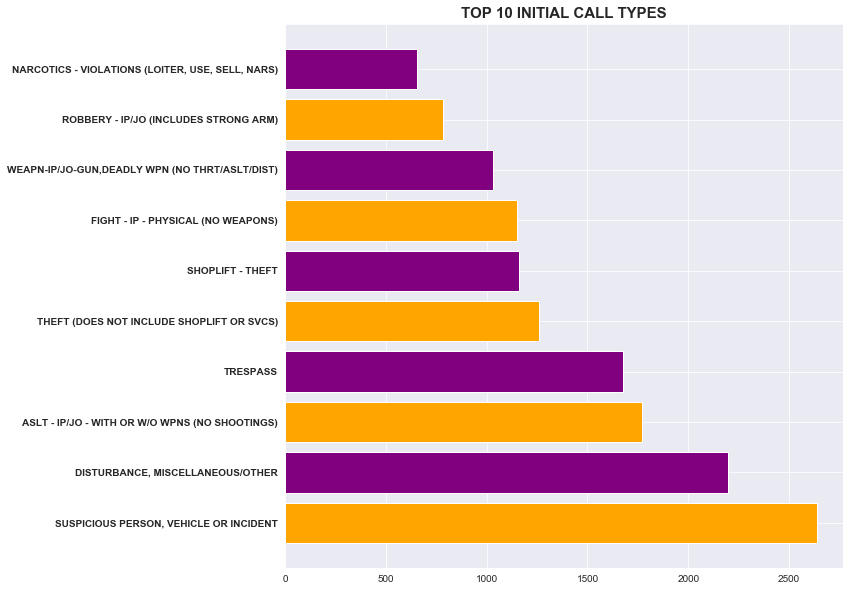

In [48]:
init_call_names = df.init_call_type.value_counts()[1:11].index
init_call_values = df.init_call_type.value_counts()[1:11].values
plt.figure(figsize=(10,10))
plt.barh(init_call_names, init_call_values, color=['orange', 'purple'])
plt.yticks(fontweight='bold')
plt.title('TOP 10 INITIAL CALL TYPES', fontweight='bold', fontsize=15)
plt.show()

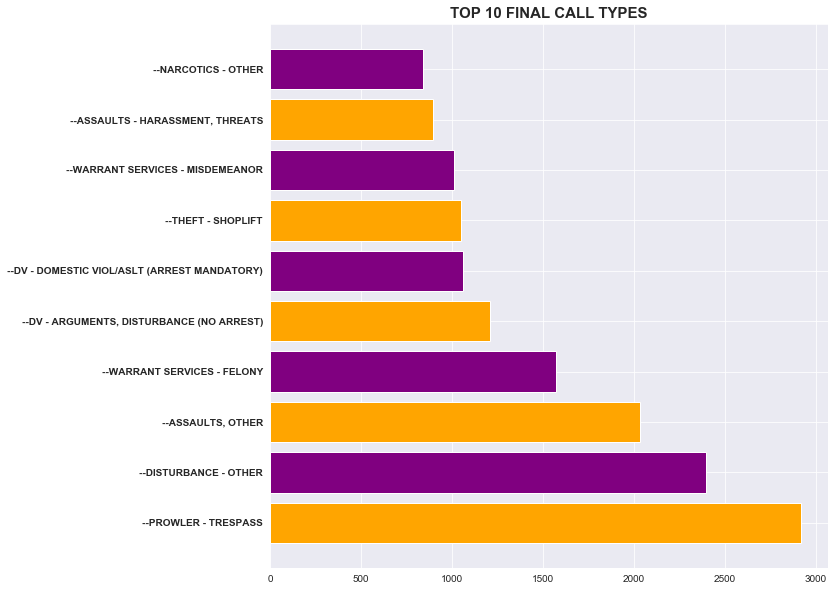

In [47]:
final_call_names = df.final_call_type.value_counts()[1:11].index
final_call_values = df.final_call_type.value_counts()[1:11].values
plt.figure(figsize=(10,10))
plt.barh(final_call_names, final_call_values, color=['orange', 'purple'])
plt.yticks(fontweight='bold')
plt.title('TOP 10 FINAL CALL TYPES', fontweight='bold', fontsize=15)
plt.show()

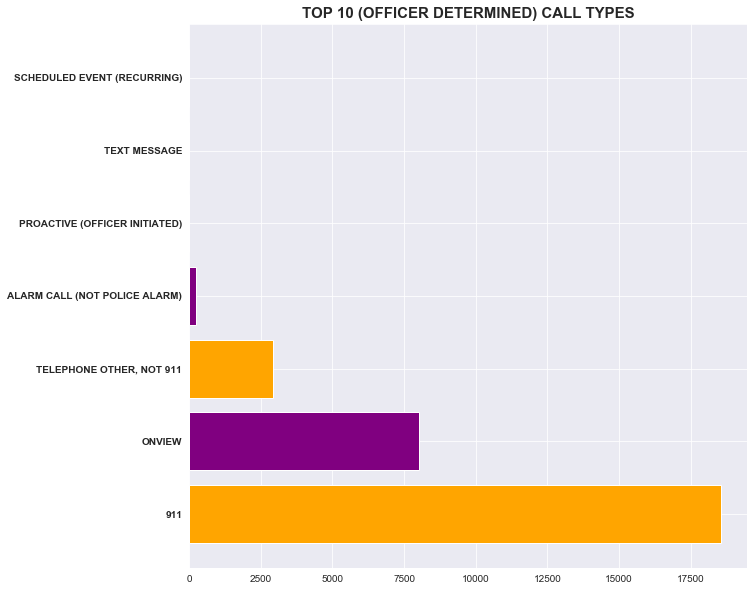

In [46]:
plt.figure(figsize=(10,10))
plt.barh(df.call_type.value_counts().index, df.call_type.value_counts().values, color=['orange', 'purple'])
plt.yticks(fontweight='bold')
plt.title('TOP 10 (OFFICER DETERMINED) CALL TYPES', fontweight='bold', fontsize=15)
plt.show()

# Beats

In further researching information from the graph below I found a kmz file (map) of Seattle's police beats. I also found a displacement risk graph from Seattle's Department of Planning and Development (https://www.seattle.gov/dpd/cs/groups/pan/@pan/documents/web_informational/p2273984.pdf). In comparing the two I found that the beats with the most stops corresponded with areas of high displacement risk.

In [14]:
print('{} {}'.format('N/A:', df.specific_beat.isna().sum()))
print('{} {}'.format('Total Values:', len(df.specific_beat)))
print('{} {}'.format('% Missing:', df.specific_beat.isna().sum()/len(df.specific_beat)))

N/A: 9741
Total Values: 42566
% Missing: 0.22884461777005122


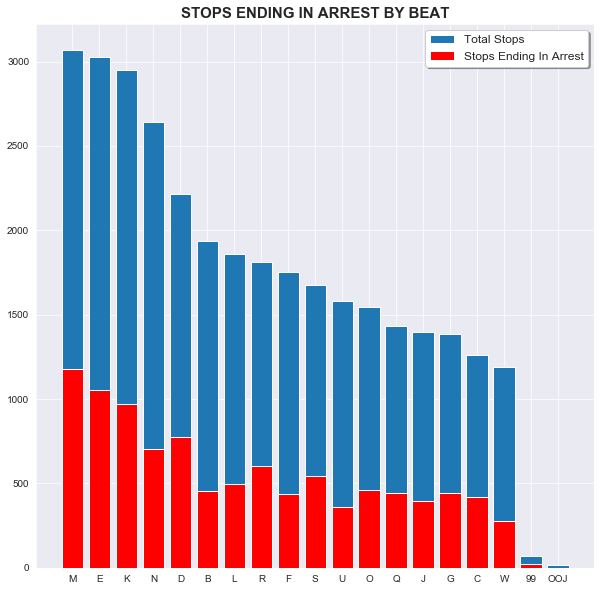

In [77]:
beat_total = df.beat.value_counts()
beat_arrest = df[df.stop_resolution == 'Arrest'].beat.value_counts()

plt.figure(figsize=(10,10))
plot_1 = plt.bar(beat_total.index, beat_total.values)
plot_2 = plt.bar(beat_arrest.index, beat_arrest.values, color='red')
plt.title('STOPS ENDING IN ARREST BY BEAT', fontweight='bold', fontsize=15)
plt.legend(['Total Stops','Stops Ending In Arrest'], fontsize='large', shadow=True, facecolor='white')
plt.show()

---

### Stops by officer and arrests

The officer age graph shows a positive skew. A standard scaler may be needed in order to normalize the graph for use in modeling. 

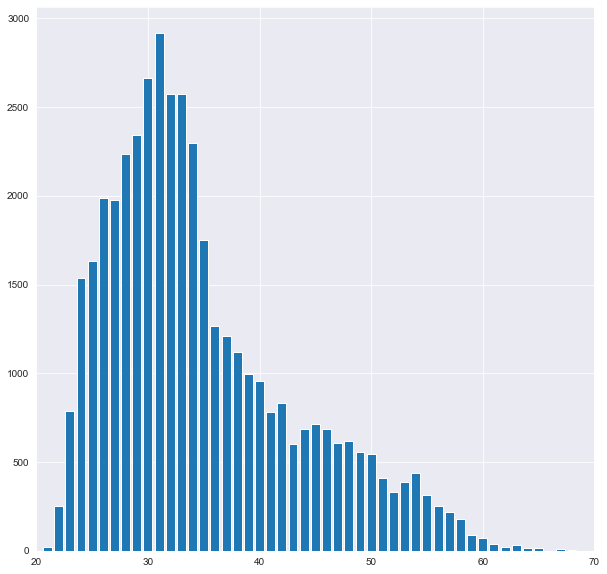

In [94]:
plt.figure(figsize=(10,10))
plt.bar(df.off_age.value_counts().index, df.off_age.value_counts().values)
plt.xlim(20,70)
plt.show()

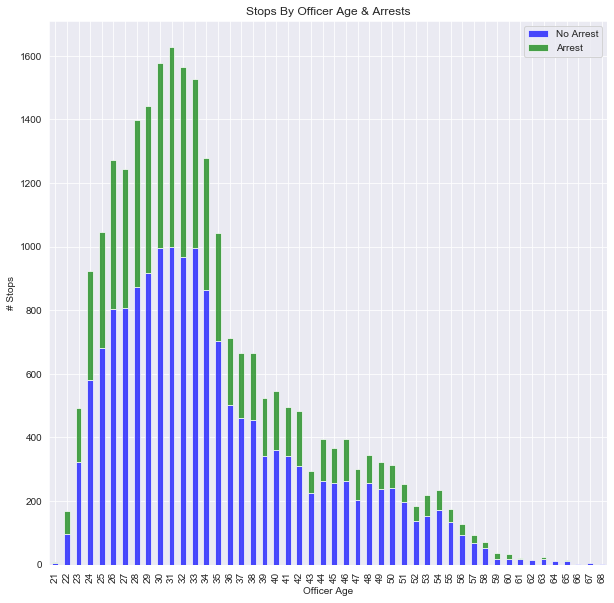

In [13]:
o_age = df_nc.groupby(['off_age','stop_resolution']).off_age.count().unstack()
p = o_age.plot(kind = 'bar', stacked = True, 
                   title = 'Stops By Officer Age & Arrests', 
                   color = ['blue','green'], alpha = .70, figsize=(10,10))
p.set_xlabel('Officer Age')
p.set_ylabel('# Stops')
p.legend(['No Arrest','Arrest'])
plt.show()

---

## percentage of stops ending in arrest by officer race

In [14]:
# White officer arrest percentage
white_off_arrest = len(df_nc[(df_nc['off_race'] == 'White')&(df_nc['stop_resolution'] == 1)])
white_arrest_pct = white_off_arrest/len(df_nc[(df_nc['off_race'] == 'White')])
white_arrest_pct

0.34823636271887776

In [15]:
# Black officer arrest percentage
black_off_arrest = len(df_nc[(df_nc['off_race'] == 'Black or African American')&(df_nc['stop_resolution'] == 1)])
black_arrest_pct = black_off_arrest/len(df_nc[(df_nc['off_race'] == 'Black or African American')])
black_arrest_pct

0.2824919441460795

In [16]:
# Two or More Races officer arrest percentage
mixed_off_arrest = len(df_nc[(df_nc['off_race'] == 'Two or More Races')&(df_nc['stop_resolution'] == 1)])
mixed_arrest_pct = mixed_off_arrest/len(df_nc[(df_nc['off_race'] == 'Two or More Races')])
mixed_arrest_pct

0.308411214953271

In [18]:
# Hispanic officer arrest percentage
hispanic_off_arrest = len(df_nc[(df_nc['off_race'] == 'Hispanic or Latino')&(df_nc['stop_resolution'] == 1)])
hispanic_arrest_pct = hispanic_off_arrest/len(df_nc[(df_nc['off_race'] == 'Hispanic or Latino')])
hispanic_arrest_pct

0.36384096024006

In [19]:
# Asian officer arrest percentage
asian_off_arrest = len(df_nc[(df_nc['off_race'] == 'Asian')&(df_nc['stop_resolution'] == 1)])
asian_arrest_pct = asian_off_arrest/len(df_nc[(df_nc['off_race'] == 'Asian')])
asian_arrest_pct

0.2829827915869981

In [20]:
# Pacific Islander officer arrest percentage
pi_off_arrest = len(df_nc[(df_nc['off_race'] == 'Nat Hawaiian/Oth Pac Islander')&(df_nc['stop_resolution'] == 1)])
pi_arrest_pct = pi_off_arrest/len(df_nc[(df_nc['off_race'] == 'Nat Hawaiian/Oth Pac Islander')])
pi_arrest_pct

0.24

In [21]:
# Native officer arrest percentage
native_off_arrest = len(df_nc[(df_nc['off_race'] == 'American Indian/Alaska Native')&(df_nc['stop_resolution'] == 1)])
native_arrest_pct = native_off_arrest/len(df_nc[(df_nc['off_race'] == 'American Indian/Alaska Native')])
native_arrest_pct

0.35555555555555557

In [22]:
df_nc.off_race.unique()

array(['White', 'Asian', 'American Indian/Alaska Native',
       'Black or African American', 'Hispanic or Latino',
       'Two or More Races', 'Nat Hawaiian/Oth Pac Islander'], dtype=object)

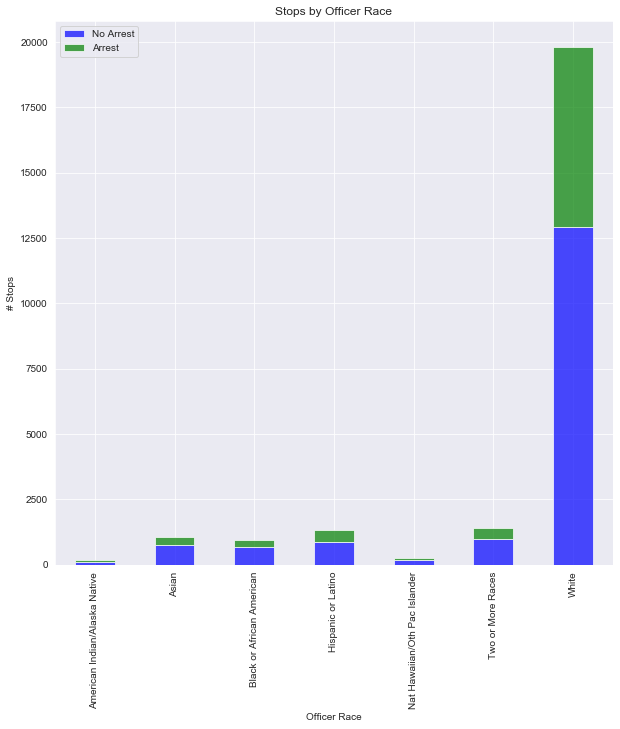

In [23]:
o_race = df_nc.groupby(['off_race','stop_resolution']).off_race.count().unstack()
o = o_race.plot(kind = 'bar', stacked = True, 
                   title = 'Stops by Officer Race', 
                   color = ['blue','green'], alpha = .70, figsize=(10,10))
o.set_xlabel('Officer Race')
o.set_ylabel('# Stops')
o.legend(['No Arrest','Arrest'])
plt.show()

---

### Percent of stops by race

In [24]:
df_nc['subj_perceived_race'].value_counts()

White                                        13257
Black or African American                     8463
Hispanic                                      1014
Asian                                          891
American Indian or Alaska Native               832
Multi-Racial                                   462
Native Hawaiian or Other Pacific Islander       29
Name: subj_perceived_race, dtype: int64

28,530 stops in total

Seattle Population White: 68%
Percentage Stops White: 53.3%

In [25]:
white_stops = len(df_nc[df_nc['subj_perceived_race']=='White'])/len(df_nc)
white_stops

0.5313852813852814

Seattle Population Black: 7%
Percentage Stops Black: 33.7%

Stopped at 4.81 times the population percentage

In [26]:
black_stops = len(df_nc[df_nc['subj_perceived_race']=='Black or African American'])/len(df_nc)
black_stops

0.3392255892255892

Seattle Population Hispanic: 6.6%
Percentage Stops Hispanic: 4.2%

In [27]:
hispanic_stops = len(df_nc[df_nc['subj_perceived_race']=='Hispanic'])/len(df_nc)
hispanic_stops

0.04064454064454064

Seattle Population Asian: 15%
Percentage Stops Asian: 3.5%

In [28]:
asian_stops = len(df_nc[df_nc['subj_perceived_race']=='Asian'])/len(df_nc)
asian_stops

0.03571428571428571

Seattle Population American Indian or Alaska Native: 0.6%
Percentage Stops American Indian or Alaska Native: 3.3%

Stopped at 5.5 times the population percentage

In [29]:
native_stops = len(df_nc[df_nc['subj_perceived_race']=='American Indian or Alaska Native'])/len(df_nc)
native_stops

0.03334936668270001

Seattle Population Mixed: 6.8%
Percentage Stops Mixed: 1.9%

In [30]:
mixed_stops = len(df_nc[df_nc['subj_perceived_race']=='Multi-Racial'])/len(df_nc)
mixed_stops

0.018518518518518517

Seattle Population Hawaiian/Pacific Islander: 0.3%
Percentage Stops Mixed: 0.001%

In [31]:
pi_stops = len(df_nc[df_nc['subj_perceived_race']=='Native Hawaiian or Other Pacific Islander'])/len(df_nc)
pi_stops

0.0011624178290844957

In [32]:
df_nc.subj_perceived_race.unique()

array(['Multi-Racial', 'White', 'Black or African American', 'Asian',
       'American Indian or Alaska Native', 'Hispanic',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [33]:
# Percent of stops by race
race_stops = [white_stops, black_stops, native_stops, hispanic_stops, mixed_stops, asian_stops, pi_stops]

In [34]:
race_pct_pop = [.68, .07, .006, .066, .068, .15, .003]

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


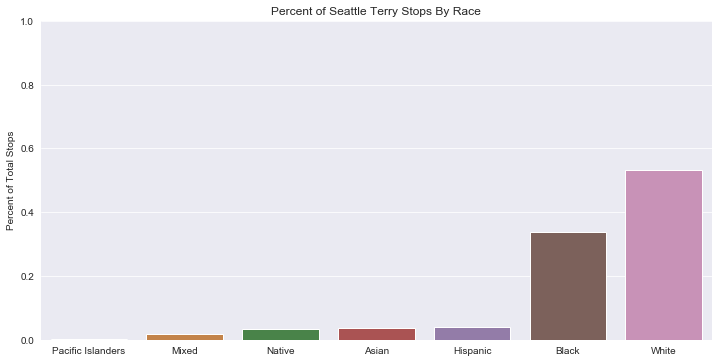

In [35]:
g = sns.catplot(x=race_stops, y=race_stops,
                data=df_nc, saturation=.5,
                kind="bar", ci=None, aspect=2)

axes = g.axes.flatten()
axes[0].set_title("Percent of Seattle Terry Stops By Race")

(g.set_axis_labels("", "Percent of Total Stops")
  .set_xticklabels(["Pacific Islanders", "Mixed", "Native", "Asian", "Hispanic", "Black", "White"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.show()

---

### Seattle's Population by Race

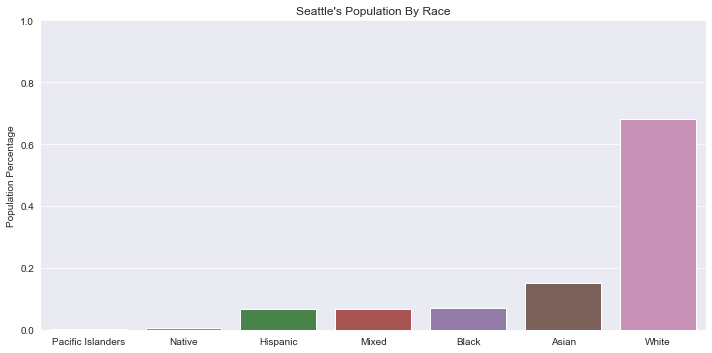

In [36]:
g_2 = sns.catplot(x=race_pct_pop, y=race_pct_pop,
                data=df_nc, saturation=.5,
                kind="bar", ci=None, aspect=2)

axes = g_2.axes.flatten()
axes[0].set_title("Seattle's Population By Race")

(g_2.set_axis_labels("", "Population Percentage")
  .set_xticklabels(["Pacific Islanders", "Native", "Hispanic", "Mixed", "Black", "Asian", "White"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.show()

---

### Stops leading to arrest by subject race

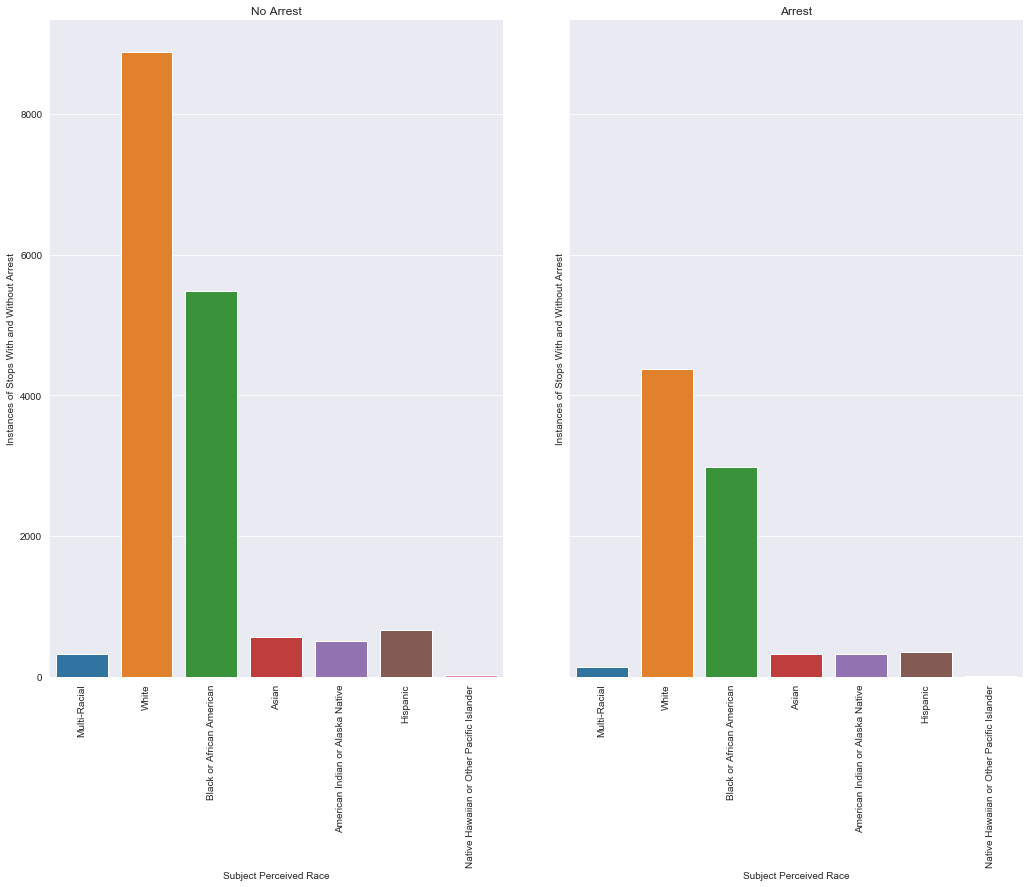

In [37]:
h = sns.catplot(x="subj_perceived_race", col="stop_resolution",
                data=df_nc, kind="count", legend=True,
                height=10, aspect=.75);
axes = h.axes.flatten()
axes[0].set_title("No Arrest")
axes[1].set_title("Arrest")
h.set(ylabel='Instances of Stops With and Without Arrest')
h.set(xlabel='Subject Perceived Race')
sns.set(font_scale=1.25)
h.set_xticklabels(rotation=90)
plt.show()

Percent stops ending in arrest by race

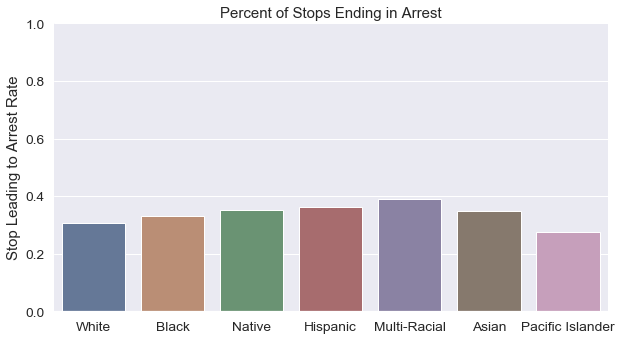

In [38]:
g = sns.catplot(x="subj_perceived_race", y="stop_resolution",
                data=df_nc, saturation=.5,
                kind="bar", ci=None, aspect=2)

axes = g.axes.flatten()
axes[0].set_title("Percent of Stops Ending in Arrest")

(g.set_axis_labels("", "Stop Leading to Arrest Rate")
  .set_xticklabels(["White", "Black", "Native", "Hispanic", "Multi-Racial", "Asian", "Pacific Islander"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.show()

---

# Weapons found in stops

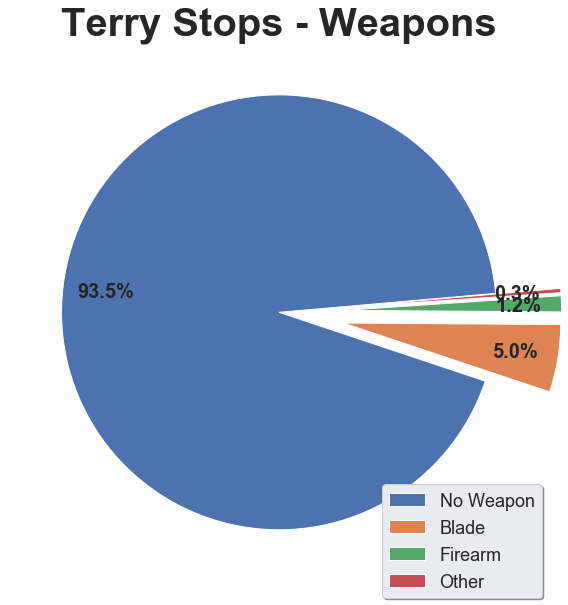

In [39]:
sizes = [26671, 1430, 339, 90]
explode = (0, 0.3, 0.3, 0.3)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, 
        explode=explode,
        autopct='%1.1f%%', 
        shadow=False, 
        startangle=5,
        labeldistance=1,
        pctdistance=.8,
        textprops={'fontsize': 20, 'weight':'bold'})
ax1.set_title('Terry Stops - Weapons', size=40, weight="bold")
ax1.legend(labels=['No Weapon', 'Blade', 'Firearm', 'Other'], 
           bbox_to_anchor=(.1, .1, .9, .1),
           shadow=True,
           fontsize='large')

plt.show()

---